In [10]:
#importing the required libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [11]:
# uploading csv file
from google.colab import files
uploaded = files.upload()


Saving iris.csv to iris (3).csv


In [16]:
#reading data from the csv file
data = pd.read_csv('iris.csv', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
print(data)


     sepal_length  sepal_width  petal_length  petal_width      class
0    sepal.length  sepal.width  petal.length  petal.width    variety
1             5.1          3.5           1.4           .2     Setosa
2             4.9            3           1.4           .2     Setosa
3             4.7          3.2           1.3           .2     Setosa
4             4.6          3.1           1.5           .2     Setosa
..            ...          ...           ...          ...        ...
146           6.7            3           5.2          2.3  Virginica
147           6.3          2.5             5          1.9  Virginica
148           6.5            3           5.2            2  Virginica
149           6.2          3.4           5.4          2.3  Virginica
150           5.9            3           5.1          1.8  Virginica

[151 rows x 5 columns]


Dividing the dataset as development and test.

In [17]:
#randomize the indices
indices = np.random.permutation(data.shape[0])
div = int(0.75 * len(indices))
development_id, test_id = indices[:div], indices[div:]
#dividing the dataset using randomized indices
development_set, test_set = data.loc[development_id,:], data.loc[test_id,:]
print("Development Set:\n", development_set, "\n\nTest Set:\n", test_set)
mean_development_set = development_set.mean()
mean_test_set = test_set.mean()
std_development_set = development_set.std()
std_test_set = test_set.std()

Development Set:
     sepal_length sepal_width petal_length petal_width       class
15           5.8           4          1.2          .2      Setosa
41             5         3.5          1.3          .3      Setosa
83           5.8         2.7          3.9         1.2  Versicolor
52           6.4         3.2          4.5         1.5  Versicolor
8              5         3.4          1.5          .2      Setosa
..           ...         ...          ...         ...         ...
44             5         3.5          1.6          .6      Setosa
65           5.6         2.9          3.6         1.3  Versicolor
142          6.9         3.1          5.1         2.3   Virginica
39           4.4           3          1.3          .2      Setosa
125          6.7         3.3          5.7         2.1   Virginica

[113 rows x 5 columns] 

Test Set:
      sepal_length  sepal_width  petal_length  petal_width       class
77            6.8          2.8           4.8          1.4  Versicolor
118          

<ipython-input-17-98ef941852bf>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_development_set = development_set.mean()
<ipython-input-17-98ef941852bf>:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_test_set = test_set.mean()
<ipython-input-17-98ef941852bf>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_development_set = development_set.std()
<ipython-input-17-98ef941852bf>:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=

Implement kNN using the following hyperparameters:

number of neighbor
    * 1,3,5,7
distance metric
    * euclidean distance
    * normalized euclidean distance
    * cosine similarity
Retrieving the 'class' column from the development and test sets and storing it in separate lists. Calculating the mean and standard deviation of the development set and test set for normalizing the data.

In [18]:
test_class = list(test_set.iloc[:,-1])
dev_class = list(development_set.iloc[:,-1])
mean_development_set = development_set.mean()
mean_test_set = test_set.mean()
std_development_set = development_set.std()
std_test_set = test_set.std()

<ipython-input-18-2c809fe82786>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_development_set = development_set.mean()
<ipython-input-18-2c809fe82786>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_test_set = test_set.mean()
<ipython-input-18-2c809fe82786>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_development_set = development_set.std()
<ipython-input-18-2c809fe82786>:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=No

Functions for computing the Euclidean Distance, Normalized Euclidean Distance, Cosine Similarity and k Nearest Neighbor to determine the 'class' for a given input instance.

In [19]:
def euclideanDistance(data_1, data_2, data_len):
    dist = 0
    for i in range(data_len):
        dist = dist + np.square(data_1[i] - data_2[i])
    return np.sqrt(dist)

def normalizedEuclideanDistance(data_1, data_2, data_len, data_mean, data_std):
    n_dist = 0
    for i in range(data_len):
        n_dist = n_dist + (np.square(((data_1[i] - data_mean[i])/data_std[i]) - ((data_2[i] - data_mean[i])/data_std[i])))
    return np.sqrt(n_dist)

# Title: Cosine Similarty between 2 Number Lists
# Author: dontloo
# Date: 03.27.2017
# Code version: 1
# Availability: https://stackoverflow.com/questions/18424228/cosine-similarity-between-2-number-lists
def cosineSimilarity(data_1, data_2):
    dot = np.dot(data_1, data_2[:-1])
    norm_data_1 = np.linalg.norm(data_1)
    norm_data_2 = np.linalg.norm(data_2[:-1])
    cos = dot / (norm_data_1 * norm_data_2)
    return (1-cos)

def knn(dataset, testInstance, k, dist_method, dataset_mean, dataset_std): 
    distances = {}
    length = testInstance.shape[1]
    if dist_method == 'euclidean':
        for x in range(len(dataset)):
            dist_up = euclideanDistance(testInstance, dataset.iloc[x], length)
            distances[x] = dist_up[0]
    elif dist_method == 'normalized_euclidean':
        for x in range(len(dataset)):
            dist_up = normalizedEuclideanDistance(testInstance, dataset.iloc[x], length, dataset_mean, dataset_std)
            distances[x] = dist_up[0]
    elif dist_method == 'cosine':
        for x in range(len(dataset)):
            dist_up = cosineSimilarity(testInstance, dataset.iloc[x])
            distances[x] = dist_up[0]
    # Sort values based on distance
    sort_distances = sorted(distances.items(), key=operator.itemgetter(1))
    neighbors = []
    # Extracting nearest k neighbors
    for x in range(k):
        neighbors.append(sort_distances[x][0])
    # Initializing counts for 'class' labels counts as 0
    counts = {"Iris-setosa" : 0, "Iris-versicolor" : 0, "Iris-virginica" : 0}
    # Computing the most frequent class
    for x in range(len(neighbors)):
        response = dataset.iloc[neighbors[x]][-1] 
        if response in counts:
            counts[response] += 1
        else:
            counts[response] = 1
    # Sorting the class in reverse order to get the most frequest class
    sort_counts = sorted(counts.items(), key=operator.itemgetter(1), reverse=True)
    return(sort_counts[0][0])

Using the development data set

Iterating all of the development data points and computing the class for each k and each distance metric

In [31]:
# Remove rows with non-numeric values
development_set = development_set.apply(pd.to_numeric, errors='coerce').dropna()

# Convert 'sepal_length', 'sepal_width', 'petal_length', and 'petal_width' columns to float type
development_set['sepal_length'] = development_set['sepal_length'].astype(float)
development_set['sepal_width'] = development_set['sepal_width'].astype(float)
development_set['petal_length'] = development_set['petal_length'].astype(float)
development_set['petal_width'] = development_set['petal_width'].astype(float)

# Creating a list of list of all columns except 'class' by iterating through the development set
row_list = []
for index, rows in development_set.iterrows():
    my_list = [rows.sepal_length, rows.sepal_width, rows.petal_length, rows.petal_width]       
    row_list.append(my_list)

# k values for the number of neighbors that need to be considered
k_n = [1, 3, 5, 7]

# Distance metrics
distance_methods = ['euclidean', 'normalized_euclidean', 'cosine']

# Performing kNN on the development set by iterating all of the development set data points and for each k and each distance metric
obs_k = {}
for dist_method in distance_methods:
    development_set_obs_k = {}
    for k in k_n:
        development_set_obs = []
        for i in range(len(row_list)):
            development_set_obs.append(knn(development_set, pd.DataFrame(row_list[i]), k, dist_method, mean_development_set, std_development_set))
        development_set_obs_k[k] = development_set_obs
    # Nested Dictionary containing the observed class for each k and each distance metric (obs_k of the form obs_k[dist_method][k])
    obs_k[dist_method] = development_set_obs_k
    print(dist_method.upper() + " distance method performed on the dataset for all k values!")


EUCLIDEAN distance method performed on the dataset for all k values!
NORMALIZED_EUCLIDEAN distance method performed on the dataset for all k values!
COSINE distance method performed on the dataset for all k values!


EUCLIDEAN distance method performed on the dataset for all k values!
NORMALIZED_EUCLIDEAN distance method performed on the dataset for all k values!
COSINE distance method performed on the dataset for all k values!
Computing the accuracy for the development data set and finding the optimal hyperparametes

   k  euclidean  normalized_euclidean  cosine
0  1        0.0                   0.0     0.0
1  3        0.0                   0.0     0.0
2  5        0.0                   0.0     0.0
3  7        0.0                   0.0     0.0



Best k value is 3 and best distance metric is euclidean . Ignoring k=1 if the value of accuracy for k=1 is 100%, since this mostly implies overfitting


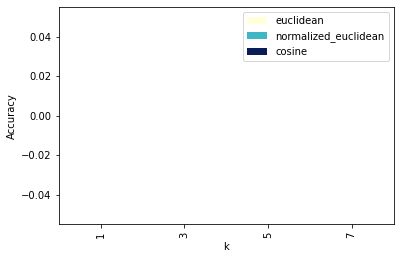

In [33]:
# Calculating the accuracy of the development set by comparing it with the development set 'class' list created earlier
accuracy = {}
for key in obs_k.keys():
    accuracy[key] = {}
    for k_value in obs_k[key].keys():
        #print('k = ', key)
        count = 0
        for i,j in zip(dev_class, obs_k[key][k_value]):
            if i == j:
                count = count + 1
            else:
                pass
        accuracy[key][k_value] = count/(len(dev_class))

# Storing the accuracy for each k and each distance metric into a dataframe
df_res = pd.DataFrame({'k': k_n})
for key in accuracy.keys():
    value = list(accuracy[key].values())
    df_res[key] = value
print(df_res)

# Plotting a Bar Chart for accuracy
draw = df_res.plot(x='k', y=['euclidean', 'normalized_euclidean', 'cosine'], kind="bar", colormap='YlGnBu')
draw.set(ylabel='Accuracy')

# Ignoring k=1 if the value of accuracy for k=1 is 100%, since this mostly implies overfitting
df_res.loc[df_res['k'] == 1.0, ['euclidean', 'normalized_euclidean', 'cosine']] = np.nan

# Fetching the best k value for using all hyper-parameters
# In case the accuracy is the same for different k and different distance metric selecting the first of all the same
column_val = [c for c in df_res.columns if not c.startswith('k')]
col_max = df_res[column_val].max().idxmax()
best_dist_method = col_max
row_max = df_res[col_max].argmax()
best_k = int(df_res.iloc[row_max]['k'])
if df_res.isnull().values.any():
    print('\n\n\nBest k value is\033[1m', best_k, '\033[0mand best distance metric is\033[1m', best_dist_method, '\033[0m. Ignoring k=1 if the value of accuracy for k=1 is 100%, since this mostly implies overfitting')
else:
    print('\n\n\nBest k value is\033[1m', best_k, '\033[0mand best distance metric is\033[1m', best_dist_method, '\033[0m.')

Using the test dataset


In [34]:
print('\n\n\nBest k value is\033[1m', best_k, '\033[0mand best distance metric is\033[1m', best_dist_method, '\033[0m')





Best k value is 3 and best distance metric is euclidean 


Using the best k value and best distance metric to determine the class for all rows in the test dataset

